# ^^^ Car Auction - Bad buy prediction ^^^

## Tasks:
## Testing different Predictive models on the dataset to see which one gives the highest accuracy on yes class for a bad buy car. 
## Considering aspects like overfitting and test the model on different variable values to find the best model for prediction.

## Import libraries

In [23]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn import preprocessing


## Read Data

In [2]:
# Read data
carAuction = pd.read_csv("carAuction.csv")
carAuction

,Auction,Color,IsBadBuy,MMRCurrentAuctionAveragePrice,Size,TopThreeAmericanName,VehBCost,VehicleAge,VehOdo,WarrantyCost,WheelType
0,ADESA,WHITE,No,2871,LARGE TRUCK,FORD,5300,8,75419,869,Alloy
1,ADESA,GOLD,Yes,1840,VAN,FORD,3600,8,82944,2322,Alloy
2,ADESA,RED,No,8931,SMALL SUV,CHRYSLER,7500,4,57338,588,Alloy
3,ADESA,GOLD,No,8320,CROSSOVER,FORD,8500,5,55909,1169,Alloy
4,ADESA,GREY,No,11520,LARGE TRUCK,FORD,10100,5,86702,853,Alloy
...,...,...,...,...,...,...,...,...,...,...,...
9995,ADESA,RED,No,7536,SMALL SUV,CHRYSLER,6600,4,85377,983,Alloy
9996,ADESA,BLACK,No,4921,LARGE TRUCK,GM,7000,7,89665,1543,Alloy
9997,ADESA,BLACK,No,9263,MEDIUM SUV,CHRYSLER,9000,4,59383,1417,Alloy
9998,ADESA,BLUE,No,3240,MEDIUM,OTHER,5500,4,48642,482,Covers


In [3]:
# Show the head rows of a data frame
carAuction.head()

,Auction,Color,IsBadBuy,MMRCurrentAuctionAveragePrice,Size,TopThreeAmericanName,VehBCost,VehicleAge,VehOdo,WarrantyCost,WheelType
0,ADESA,WHITE,No,2871,LARGE TRUCK,FORD,5300,8,75419,869,Alloy
1,ADESA,GOLD,Yes,1840,VAN,FORD,3600,8,82944,2322,Alloy
2,ADESA,RED,No,8931,SMALL SUV,CHRYSLER,7500,4,57338,588,Alloy
3,ADESA,GOLD,No,8320,CROSSOVER,FORD,8500,5,55909,1169,Alloy
4,ADESA,GREY,No,11520,LARGE TRUCK,FORD,10100,5,86702,853,Alloy


## Examine variable types and change variable types

In [4]:
# Examine variable type
carAuction.dtypes

Auction                          object
Color                            object
IsBadBuy                         object
MMRCurrentAuctionAveragePrice     int64
Size                             object
TopThreeAmericanName             object
VehBCost                          int64
VehicleAge                        int64
VehOdo                            int64
WarrantyCost                      int64
WheelType                        object
dtype: object

In [5]:
# Change categorical variables to "category"
carAuction['Auction'] = carAuction['Auction'].astype('category')
carAuction['Color'] = carAuction['Color'].astype('category')
carAuction['IsBadBuy'] = carAuction['IsBadBuy'].astype('category')
carAuction['Size'] = carAuction['Size'].astype('category')
carAuction['TopThreeAmericanName'] = carAuction['TopThreeAmericanName'].astype('category')
carAuction['WheelType'] = carAuction['WheelType'].astype('category')

In [6]:
# Examine variable type
carAuction.dtypes

Auction                          category
Color                            category
IsBadBuy                         category
MMRCurrentAuctionAveragePrice       int64
Size                             category
TopThreeAmericanName             category
VehBCost                            int64
VehicleAge                          int64
VehOdo                              int64
WarrantyCost                        int64
WheelType                        category
dtype: object

## Create dummy variables 

In [7]:
# Create dummy variables 
carAuction = pd.get_dummies(carAuction, columns=['Auction','Color','Size','TopThreeAmericanName','WheelType'], drop_first=True)
carAuction

,IsBadBuy,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost,Auction_MANHEIM,Auction_OTHER,Color_BLACK,Color_BLUE,...,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,WheelType_Covers,WheelType_Special,WheelType_unkwnWheel
0,No,2871,5300,8,75419,869,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Yes,1840,3600,8,82944,2322,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,No,8931,7500,4,57338,588,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,No,8320,8500,5,55909,1169,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,No,11520,10100,5,86702,853,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,No,7536,6600,4,85377,983,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,No,4921,7000,7,89665,1543,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
9997,No,9263,9000,4,59383,1417,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9998,No,3240,5500,4,48642,482,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0


## Partition the data into testing and training data

In [69]:
# Partition the data 
target = carAuction['IsBadBuy']
predictors = carAuction.drop(['IsBadBuy'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(7000, 39) (3000, 39) (7000,) (3000,)


In [9]:
# Examine the porportion of target variable for training data set 
print(target_train.value_counts(normalize=True))

No     0.869571
Yes    0.130429
Name: IsBadBuy, dtype: float64


In [10]:
# Examine the porportion of target variable for testing data set 
print(target_test.value_counts(normalize=True))

No     0.872667
Yes    0.127333
Name: IsBadBuy, dtype: float64


# * Decision Tree

## Build a Decision Tree max depth= 2

In [11]:
# Build a decision tree model on training data with max_depth = 2 
model = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 2)
model.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

[Text(837.0, 906.0, 'WheelType_unkwnWheel <= 0.5\nentropy = 0.559\nsamples = 7000\nvalue = [6087, 913]\nclass = No'),
 Text(418.5, 543.6, 'VehicleAge <= 4.5\nentropy = 0.472\nsamples = 6686\nvalue = [6011, 675]\nclass = No'),
 Text(209.25, 181.19999999999993, 'entropy = 0.348\nsamples = 4064\nvalue = [3799, 265]\nclass = No'),
 Text(627.75, 181.19999999999993, 'entropy = 0.626\nsamples = 2622\nvalue = [2212, 410]\nclass = No'),
 Text(1255.5, 543.6, 'Auction_MANHEIM <= 0.5\nentropy = 0.798\nsamples = 314\nvalue = [76, 238]\nclass = Yes'),
 Text(1046.25, 181.19999999999993, 'entropy = 0.567\nsamples = 247\nvalue = [33, 214]\nclass = Yes'),
 Text(1464.75, 181.19999999999993, 'entropy = 0.941\nsamples = 67\nvalue = [43, 24]\nclass = No')]

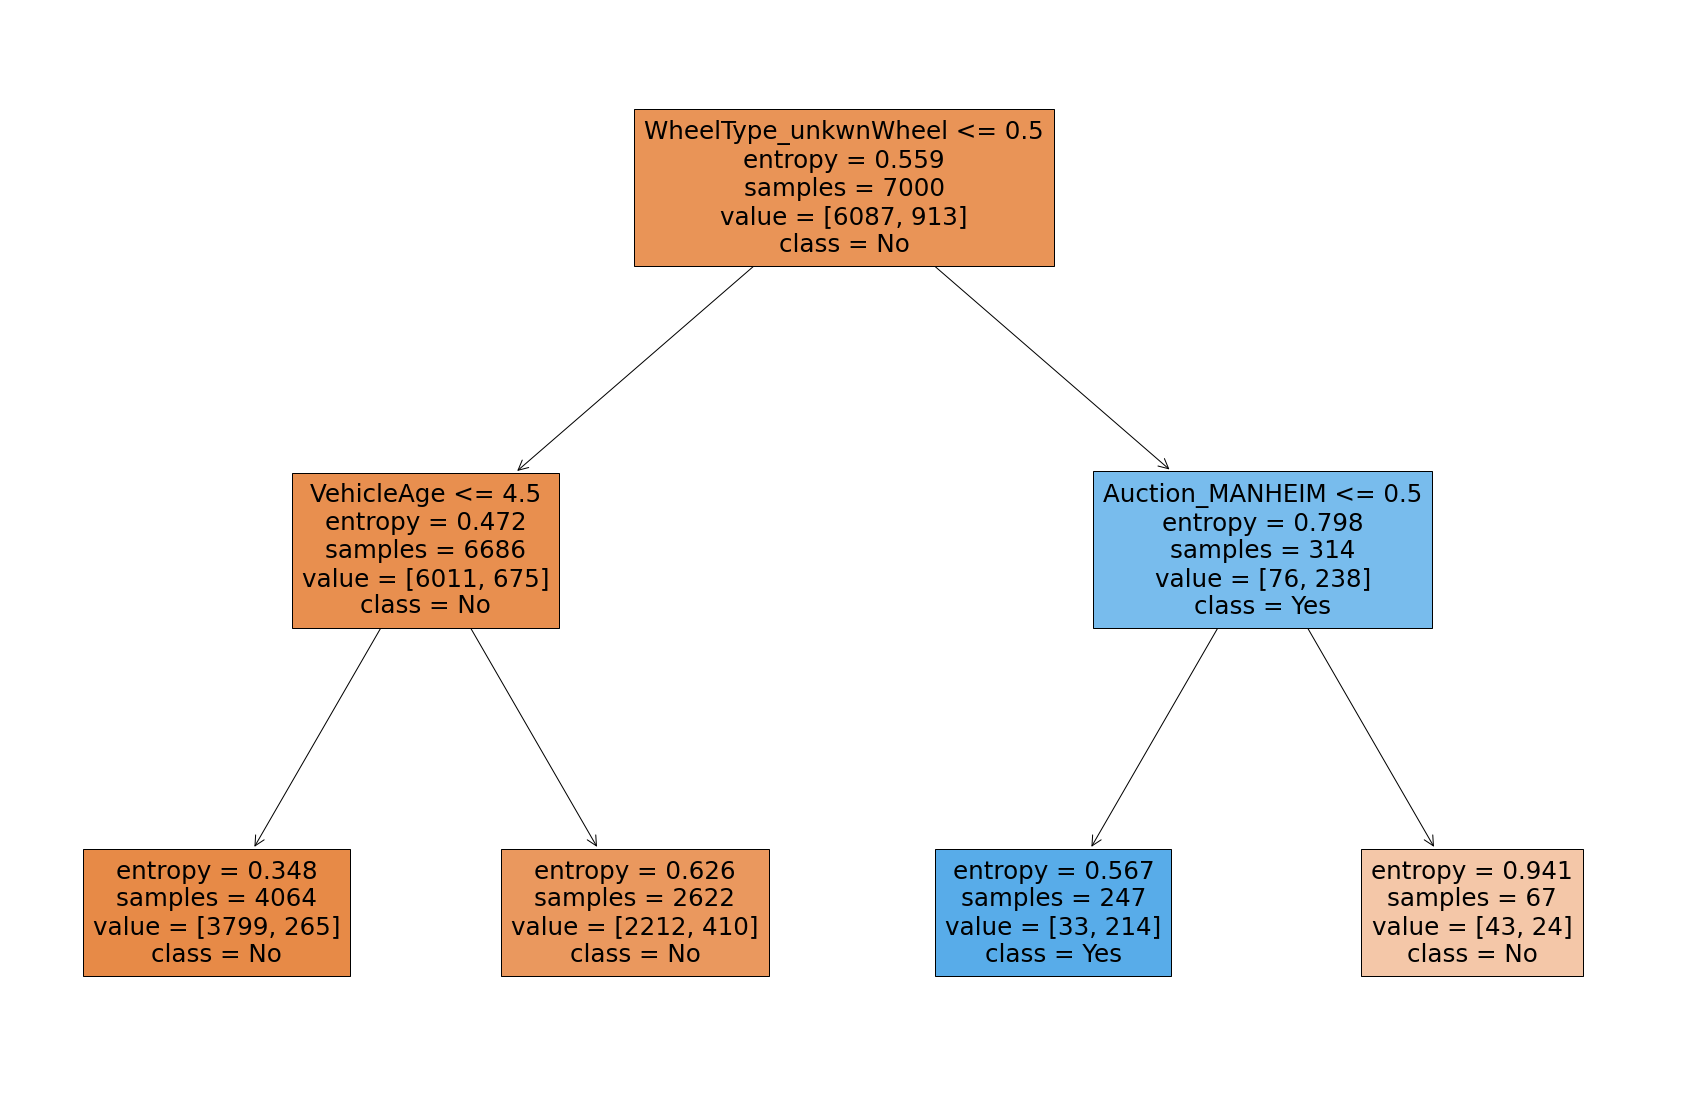

In [12]:
# Plot the tree 
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model, 
               feature_names=list(carAuction.columns)[1:],  
               class_names=['No','Yes'],
               filled=True)

In [13]:
# Text version of decision tree 
print(tree.export_text(model, feature_names=list(carAuction.columns)[1:]))

|--- WheelType_unkwnWheel <= 0.50
|   |--- VehicleAge <= 4.50
|   |   |--- class: No
|   |--- VehicleAge >  4.50
|   |   |--- class: No
|--- WheelType_unkwnWheel >  0.50
|   |--- Auction_MANHEIM <= 0.50
|   |   |--- class: Yes
|   |--- Auction_MANHEIM >  0.50
|   |   |--- class: No



## Make predictions

In [14]:
# Make predictions on testing data 
prediction_on_test = model.predict(predictors_test)

## Evaluate prediction results using confusion matrix and classification report

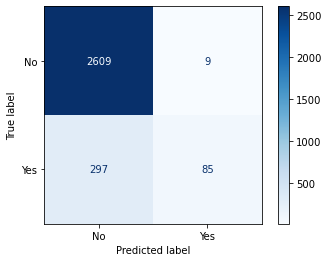

In [15]:
# Examine the evaluation results on testing data: confusion_matrix 
plot_confusion_matrix(model, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

In [16]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score 
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.90      1.00      0.94      2618
         Yes       0.90      0.22      0.36       382

    accuracy                           0.90      3000
   macro avg       0.90      0.61      0.65      3000
weighted avg       0.90      0.90      0.87      3000



## Build a Decision Tree max depth= 1

In [62]:
# Build a decision tree model on training data with max_depth = 1
model = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 1)
model.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1)

[Text(837.0, 815.4000000000001, 'WheelType_unkwnWheel <= 0.5\nentropy = 0.559\nsamples = 7000\nvalue = [6087, 913]\nclass = No'),
 Text(418.5, 271.79999999999995, 'entropy = 0.472\nsamples = 6686\nvalue = [6011, 675]\nclass = No'),
 Text(1255.5, 271.79999999999995, 'entropy = 0.798\nsamples = 314\nvalue = [76, 238]\nclass = Yes')]

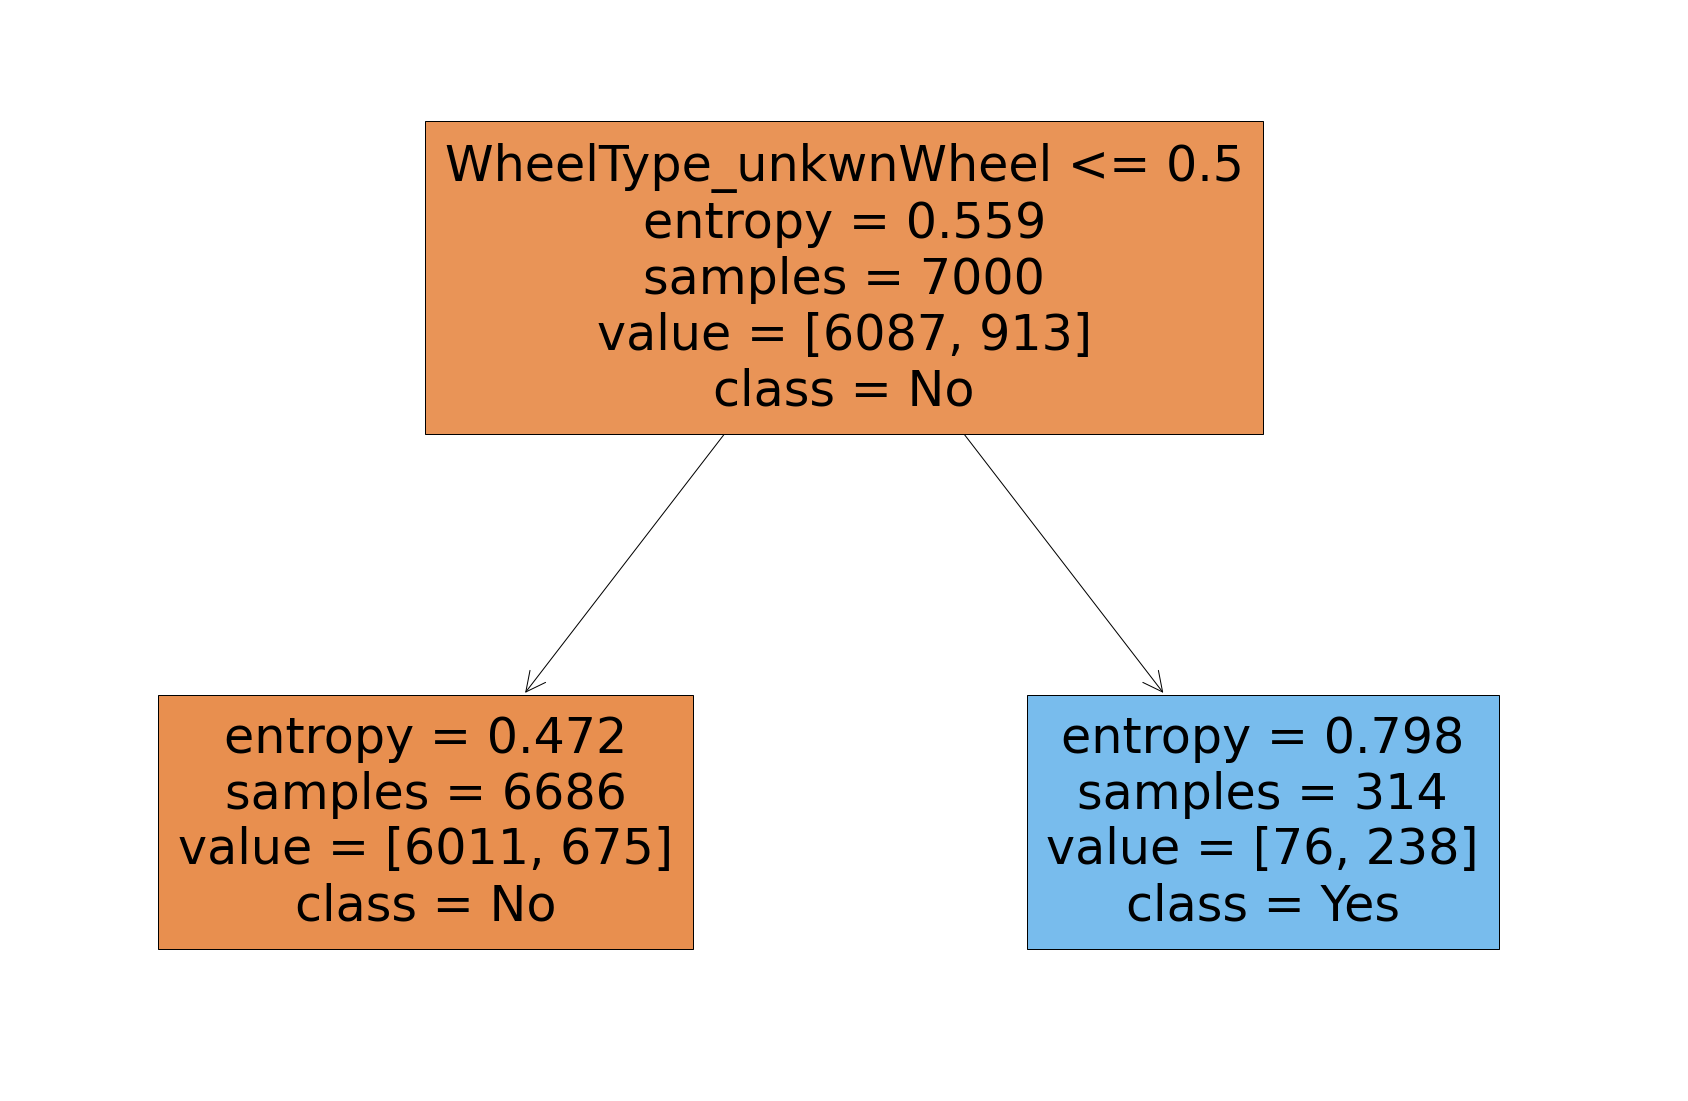

In [63]:
# Plot the tree 
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model, 
               feature_names=list(carAuction.columns)[1:],  
               class_names=['No','Yes'],
               filled=True)

In [64]:
# Text version of decision tree 
print(tree.export_text(model, feature_names=list(carAuction.columns)[1:]))

|--- WheelType_unkwnWheel <= 0.50
|   |--- class: No
|--- WheelType_unkwnWheel >  0.50
|   |--- class: Yes



In [65]:
# Make predictions on testing data 
prediction_on_test = model.predict(predictors_test)

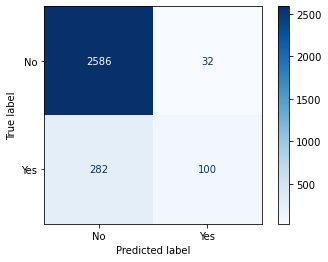

In [66]:
# Examine the evaluation results on testing data: confusion_matrix 
plot_confusion_matrix(model, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

In [67]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score 
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.90      0.99      0.94      2618
         Yes       0.76      0.26      0.39       382

    accuracy                           0.90      3000
   macro avg       0.83      0.62      0.67      3000
weighted avg       0.88      0.90      0.87      3000



### - From the above reports we can infer that the decision tree model with depth =1 has the best performance on the Yes class because it has the highest F-measure on the Yes class on testing data.

# * Naive Bayes Model

In [17]:
# Build a Naive Bayes model on training data with default setting 
modelNB = MultinomialNB()
modelNB.fit(predictors_train, target_train)

MultinomialNB()

In [19]:
# Make predictions on testing data
prediction_on_test = model.predict(predictors_test)

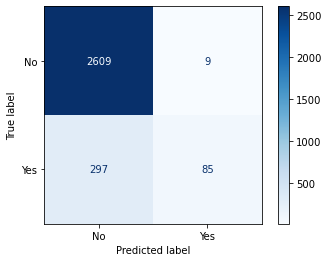

In [20]:
# Examine the evaluation results on testing data: confusion_matrix 
plot_confusion_matrix(model, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

In [22]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.90      1.00      0.94      2618
         Yes       0.90      0.22      0.36       382

    accuracy                           0.90      3000
   macro avg       0.90      0.61      0.65      3000
weighted avg       0.90      0.90      0.87      3000



### From the above 2 models we can see that Naive Bayes model can predict more badbuy cars than decision tree model.

# * KNN model

In [24]:
# Apply minmax normalization on predictors
min_max_scaler = preprocessing.MinMaxScaler()
predictors_normalized = pd.DataFrame(min_max_scaler.fit_transform(predictors))
predictors_normalized.columns = predictors.columns
predictors_normalized

,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost,Auction_MANHEIM,Auction_OTHER,Color_BLACK,Color_BLUE,Color_BROWN,...,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,WheelType_Covers,WheelType_Special,WheelType_unkwnWheel
0,0.104237,0.171627,0.875,0.672907,0.074665,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.066805,0.114136,0.875,0.744636,0.341222,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.324257,0.246026,0.375,0.500558,0.023115,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.302073,0.279844,0.500,0.486936,0.129701,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.418255,0.333953,0.500,0.780457,0.071730,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.273609,0.215590,0.375,0.767827,0.095579,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.178666,0.229117,0.750,0.808701,0.198312,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9997,0.336310,0.296753,0.375,0.520051,0.175197,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.117634,0.178390,0.375,0.417667,0.003669,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [25]:
# Partition the data
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors_normalized, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(7000, 39) (3000, 39) (7000,) (3000,)


In [26]:
# Examine the porportion of target variable for training data set
print(target_train.value_counts(normalize=True))

No     0.869571
Yes    0.130429
Name: IsBadBuy, dtype: float64


In [27]:
# Examine the porportion of target variable for testing data set
print(target_test.value_counts(normalize=True))

No     0.872667
Yes    0.127333
Name: IsBadBuy, dtype: float64


### KNN model with n_neighbors=1

In [32]:
# Build a K Nearest Neighbor model on training data with n_neighbors = 1 
model1 = KNeighborsClassifier(n_neighbors = 1)
model1.fit(predictors_train, target_train)

KNeighborsClassifier(n_neighbors=1)

In [31]:
# Make predictions on training and testing data 
prediction_on_train = model1.predict(predictors_train)
prediction_on_test = model1.predict(predictors_test)

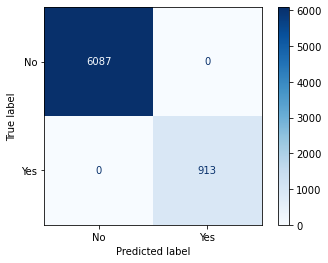

In [30]:
# Examine the evaluation results on training data: confusion_matrix 
plot_confusion_matrix(model1, predictors_train, target_train, cmap=plt.cm.Blues, values_format='d')

In [33]:
# Examine the evaluation results on training data: accuracy, precision, recall, and f1-score 
print(classification_report(target_train, prediction_on_train))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00      6087
         Yes       1.00      1.00      1.00       913

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



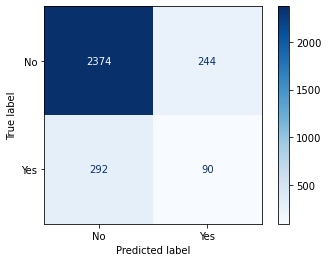

In [34]:
# Examine the evaluation results on testing data: confusion_matrix 
plot_confusion_matrix(model1, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

In [36]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score 
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.89      0.91      0.90      2618
         Yes       0.27      0.24      0.25       382

    accuracy                           0.82      3000
   macro avg       0.58      0.57      0.57      3000
weighted avg       0.81      0.82      0.82      3000



### KNN model with n_neighbors=3

In [38]:
# Build a K Nearest Neighbor model on training data with n_neighbors = 3 
model2 = KNeighborsClassifier(n_neighbors = 3)
model2.fit(predictors_train, target_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
# Make predictions on training and testing data
prediction_on_train = model2.predict(predictors_train)
prediction_on_test = model2.predict(predictors_test)

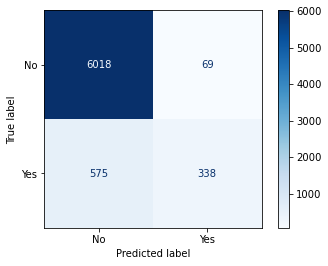

In [42]:
# Examine the evaluation results on training data: confusion_matrix 
plot_confusion_matrix(model2, predictors_train, target_train, cmap=plt.cm.Blues, values_format='d')

In [44]:
# Examine the evaluation results on training data: accuracy, precision, recall, and f1-score 
print(classification_report(target_train, prediction_on_train))

              precision    recall  f1-score   support

          No       0.91      0.99      0.95      6087
         Yes       0.83      0.37      0.51       913

    accuracy                           0.91      7000
   macro avg       0.87      0.68      0.73      7000
weighted avg       0.90      0.91      0.89      7000



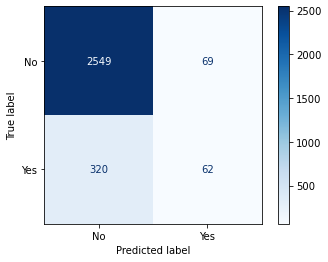

In [46]:
# Examine the evaluation results on testing data: confusion_matrix 
plot_confusion_matrix(model2, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

In [48]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score 
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.89      0.97      0.93      2618
         Yes       0.47      0.16      0.24       382

    accuracy                           0.87      3000
   macro avg       0.68      0.57      0.59      3000
weighted avg       0.84      0.87      0.84      3000



### KNN model with n_neighbors = 10

In [50]:
# Build a K Nearest Neighbor model on training data with n_neighbors = 10 
model3 = KNeighborsClassifier(n_neighbors = 10)
model3.fit(predictors_train, target_train)

KNeighborsClassifier(n_neighbors=10)

In [52]:
# Make predictions on training and testing data 
prediction_on_train = model3.predict(predictors_train)
prediction_on_test = model3.predict(predictors_test)

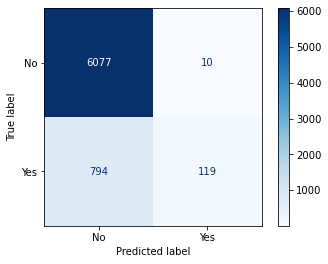

In [54]:
# Examine the evaluation results on training data: confusion_matrix 
plot_confusion_matrix(model3, predictors_train, target_train, cmap=plt.cm.Blues, values_format='d')

In [56]:
# Examine the evaluation results on training data: accuracy, precision, recall, and f1-score 
print(classification_report(target_train, prediction_on_train))

              precision    recall  f1-score   support

          No       0.88      1.00      0.94      6087
         Yes       0.92      0.13      0.23       913

    accuracy                           0.89      7000
   macro avg       0.90      0.56      0.58      7000
weighted avg       0.89      0.89      0.85      7000



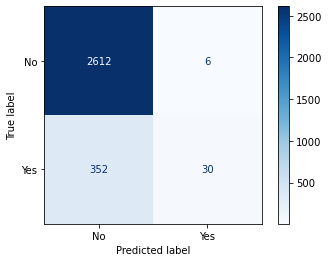

In [57]:
# Examine the evaluation results on testing data: confusion_matrix 
plot_confusion_matrix(model3, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

In [58]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score 
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.88      1.00      0.94      2618
         Yes       0.83      0.08      0.14       382

    accuracy                           0.88      3000
   macro avg       0.86      0.54      0.54      3000
weighted avg       0.88      0.88      0.83      3000



### - After trying different number of neighbors above. We can conclude that the n_neighbors=1 model is the best to identify bad buy cars. Because it can identify the most bad buy cars on the testing data.

### - Another inference that can be drawn from the above is that as we increase the value of n_neighbors, the accuracy on the training data decreases and the accuracy on the testing data increases.

# * Best Model:
## From all the above models Decision Tree max depth= 1 Model gives us the best perfomance as it has the highest f-measure on Yes class and the accuracy is 90% on testing data. 